In [16]:
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
folder = "./models/"
model_name = "emoji_model-spm50k-embed16"
model = load_model(f"{folder}{model_name}.h5")
with open(f"{folder}{model_name}_tokenizer.pkl", "rb") as handle:
	tokenizer = pickle.load(handle)
	
padding_type = "post"
trunc_type = "post"
max_length = 200
oov_token = "<OOV>"

1/1 [==============================] - 0s 17ms/step


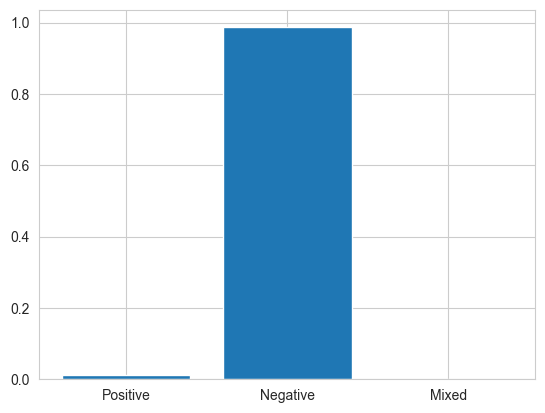

In [37]:
o_article = """️В Одеській області ворожі ракети потрапили в багатоповерхівку та в базу відпочинку

Вже відомо про 17 загиблих та 31 постраждалий. 

Є попадання у житловий будинок та базу відпочинку. Рашисти вдарили 3 ракетами Х-22 по одному з районів Одеської області, де потрапили по багатоквартирному будинку та двом базам відпочинку - повідомляє ОК "Південь".

Ракети вдарили по сплячих людях."""

def preprocess_article(article):
	article = article.lower()
	article = tokenizer.encode([article])
	article = pad_sequences(article, maxlen=max_length, padding=padding_type, truncating=trunc_type)
	return article

article = preprocess_article(o_article)

prediction = model.predict(article)
# plot the result
import matplotlib.pyplot as plt

plt.bar(range(3), prediction[0])
plt.xticks(range(3), ["Positive", "Negative", "Mixed"])
plt.show()

1/1 [==============================] - 0s 24ms/step


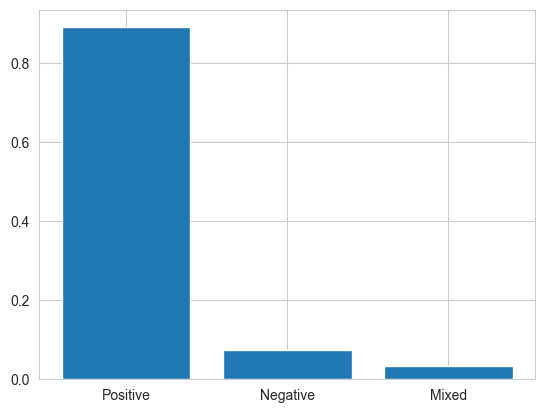

In [38]:
o_article = """На працівника ТЦК напали з ножем на Хмельниччині.

Подія відбулась у Книжківцях. Під час перевірки документів чоловік дістав ніж, напав на представника ТЦК та поранив його у ліве плече. 

Військового госпіталізували, а порушника затримали. У нього також знайшли заборонену речовину та шокер."""

article = preprocess_article(o_article)

prediction = model.predict(article)
# plot the result
import matplotlib.pyplot as plt

plt.bar(range(3), prediction[0])
plt.xticks(range(3), ["Positive", "Negative", "Mixed"])
plt.show()